# Generating data for a simple recall task

In [1]:
# imports n stuff
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from hardworking_memory import *

## Specifying the common parameters (between match and nomatch conditions)

In [2]:
frange = (1, 20, 3) # range of frequencies to be used (min, max, step)
n_events = 3        # number of events per stimulus
t_events = 200      # duration of each event, so each duration of stimulus = t_events*n_events
t_response = 200    # duration of response
t_delay = 200       # duration of delay between source stimulus and target stimulus

source_generator_kw = {"event_duration": t_events, "frequencies":None}
target_generator_kw = source_generator_kw.copy()

trial_kw = {"source_generator":make_sin_stimulus,
            "source_generator_kw":source_generator_kw,
            "target_generator":make_sin_stimulus,
            "target_generator_kw":target_generator_kw,
            "t_response":t_response,
            "t_silence":t_delay,
            "global_noise":0.0}

## Specifying condition specific parameters
The transformation here is scale_one_off that randomly changes the frequency of one event in the target signal. The new frequency is from the same frequency range. retrograde is False, which means the temporal order of target signal follows the source (it's not reveresed in time).

There will be 4 rows:


    1. the signal itself
    2. cue signal
    3. the correct response (match = 1, nomatch = -1)
    4. condition cue (recall = -1, wm = 1) 

In [3]:
match_frequencies = template_generator(n_trials = 60,
                                       transformation = None,
                                       retrograde = False)

nomatch_frequencies = template_generator(n_trials = 40,
                                         transformation = scale_one_off,
                                         transformation_kw= {"frequency_range":frange},
                                         retrograde = False)

## Generating match conditions

(4, 60, 1600)


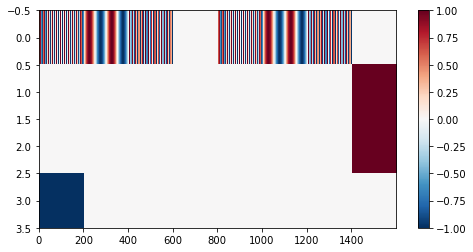

In [4]:
match_block = experiment_generator(frequency_mat = match_frequencies,
                                   trial_generator = trial_generator,
                                   trial_generator_kw = trial_kw,
                                   is_wm=False,
                                   is_match=True,
                                   is_3d=True)
print(match_block.shape)
plt.figure(figsize=(8,4))
plt.imshow(match_block[:,0,:],aspect = 'auto', interpolation='none',cmap='RdBu_r')
plt.colorbar()

## Generate no match conditions

(4, 40, 1600)


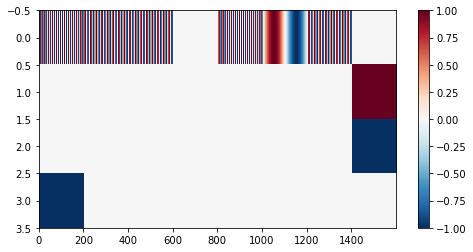

In [5]:
nomatch_block = experiment_generator(frequency_mat = nomatch_frequencies,
                                     trial_generator = trial_generator,
                                     trial_generator_kw = trial_kw,
                                     is_wm=False,
                                     is_match=False,
                                     is_3d=True)
print(nomatch_block.shape)
plt.figure(figsize=(8,4))
plt.imshow(nomatch_block[:,0,:],aspect = 'auto', interpolation='none',cmap='RdBu_r')
plt.colorbar()

## Preparing the experiment

(4, 160000)


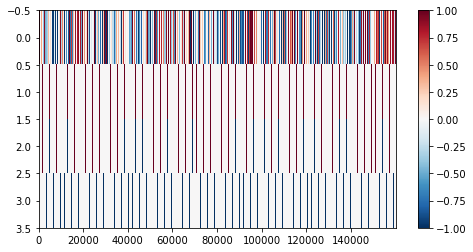

In [6]:
# sklearn does weird things with the signal during shuffling so...
experiment = np.concatenate((match_block,nomatch_block),axis=1)
experiment = np.transpose(experiment,axes=(1,0,2))
np.random.shuffle(experiment) 

# stacking trials at the end of each other (3D to 2D) 
experiment = np.hstack(experiment) 
print(experiment.shape)

plt.figure(figsize=(8,4))
plt.imshow(experiment,aspect = 'auto', interpolation='none',cmap='RdBu_r')
plt.colorbar()

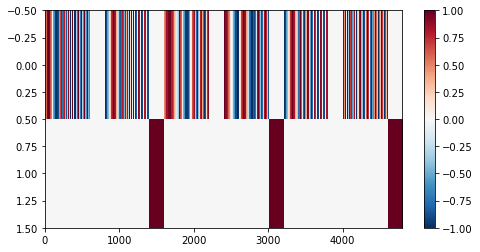

In [9]:
X_train, X_test, y_train, y_test = train_test_split(experiment[:2,:].T,
                                                    experiment[2,:].T,
                                                    test_size=.4,
                                                    shuffle=False)

plt.figure(figsize=(8,4))
plt.imshow(X_train[:4800].T,aspect = 'auto', interpolation='none',cmap='RdBu_r')
plt.colorbar()

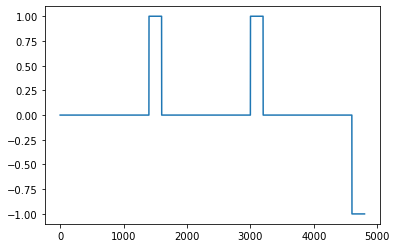

In [10]:
plt.plot(y_train[:4800])

In [17]:
print(f"X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}")


X_train: (96000, 2)
X_test: (64000, 2)
y_train: (96000,)
y_test: (64000,)
